In [162]:
%run Algorithms.ipynb


In [163]:
def evaluate_algorithm(algorithm, G, *args, **kwargs):
    start_time = time.time()
    best_solution, best_cost, cost_progress = algorithm(G, *args, **kwargs)
    end_time = time.time()
    execution_time = end_time - start_time

    print("Graph:", G)
    print(f"Minimum Vertex Cover found ({algorithm.__name__}):", best_solution)
    print("Number of Vertices in Cover:", best_cost)
    print(f"Execution Time: {execution_time:.4f} seconds")

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    pos = nx.spring_layout(G)
    node_colors = ['red' if best_solution[node] else 'skyblue' for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1000, font_size=16, 
            edge_color='gray', font_color='black', ax=axes[0])
    axes[0].set_title("Random Graph with Vertex Cover", size=15)

    axes[1].plot(cost_progress, label="Cost of Best Solution", color='blue')
    axes[1].set_xlabel('Iteration')
    axes[1].set_ylabel('Best Cost (Number of Vertices)')
    axes[1].set_title(f'{algorithm.__name__} Progress', size=15)
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()
    
    return best_cost, execution_time

def evaluate_brute_force_algorithm(G):
    start_time = time.time()
    vertex_cover, best_cost = brute_force(G)
    end_time = time.time()
    brute_force_time = end_time - start_time

    print("Graph:", G)
    print("Minimum Vertex Cover found:", vertex_cover, best_cost)
    print(f"Brute Force Execution Time: {brute_force_time:.4f} seconds")

    plt.figure(figsize=(4, 3))
    node_colors = ['skyblue' if node not in vertex_cover else 'red' for node in G.nodes()]
    nx.draw(G, with_labels=True, node_color=node_colors, node_size=1000, font_size=16, edge_color='gray', font_color='black')
    plt.title("Random Graph with 8 Nodes", size=20)
    plt.show()
    
    return best_cost, brute_force_time

def evaluate(G):
    #brute_cost, brute_time = evaluate_brute_force_algorithm(G)
    #----------------------------------------------------
    max_iter = 10000
    k=0.5
    sim_cost, sim_time = evaluate_algorithm(simulated_annealing, G, max_iter,k)
    #----------------------------------------------------
    max_iter_vns = 1000
    k_max = 5
    move_prob = 0.3
    vns_args = (max_iter_vns, k_max, move_prob)
    vns_cost, vns_time = evaluate_algorithm(vns, G, *vns_args)

    #print("BRUTE Vertex Cover found:", brute_cost, brute_time)
    print("SIM Vertex Cover found:", sim_cost, sim_time)
    print("VNS Vertex Cover found:", vns_cost, vns_time)

Graph: Graph with 6 nodes and 7 edges
Minimum Vertex Cover found (genetic_algorithm): [True, False, True, False, False, True]
Number of Vertices in Cover: -inf
Execution Time: 1.1818 seconds


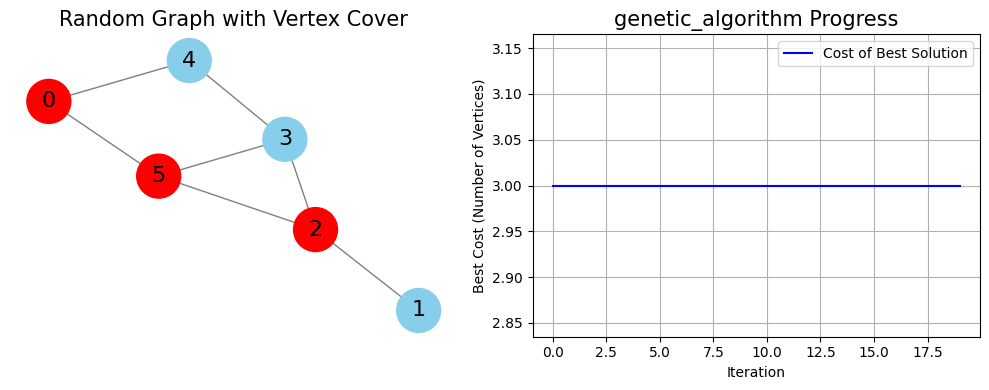

(-inf, 1.1817936897277832)

In [164]:
import networkx as nx
import matplotlib.pyplot as plt
import time

G = nx.erdos_renyi_graph(6, 0.5)
#evaluate(G)

# Extract edges as a list of tuples
edges = list(G.edges())

evaluate_algorithm(genetic_algorithm, G, population_size=500, generations=20, initial_mutation_rate=0.05, elitism_percent=0.05, gradual_mutation=True)

